# Homework 8

Zachary Qian

UCLA ID: 905211936

I affirm that I personally wrote the text, code, and comments in this homework assignment.


# Problem 0

This week is the right time for you to be working together with your group to assemble your final project submission. You should have many of the required pieces by now, so your main tasks are to coordinate and agree on how to arrange and present the various required components. There will be no more project time during Discussion sections. 

# Problem 1

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "foward" one unit; if tails, we move "backward." 

## Part A

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code, or use posted solutions for HW1. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 

In [20]:
# # solution (with demonstration) here
import random
def rw(n):
    """
    Perform random walk of given length n
    """
    position = 1 #start at 0
    log = [] #create log
    log.append(position) #append initial position
    for i in range(0,n-1): #loop until count n-1 because we already had an initial position
        x = random.choice([1,-1]) #give random choice of random walk length 1
        position += x #increment our position
        log.append(position) #add to log
    return log #return log


    




In [30]:
rw(5)

[1, 2, 3, 2, 3]

## Part B

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- Discussion 12. 

In [90]:
# solution (with demonstration) here
import numpy as np
def rw2(n):
    log = np.append(np.array([1]), np.random.choice(a=[-1,1], size=n-1)).cumsum(0)
    return log 

array([1, 2, 1, 0, 1])

In [104]:
rw2(5)
#---------------------------- CODE BELOW IS JUST MY WORK TO SHOW YOU MY THOUGHT PROCESS!! NOT THE ACTUAL SOLN.

array([1, 2, 3, 2, 1])

In [92]:
#np.append(np.array([1]),np.random.randint(-1,1,4)).cumsum(0)
#temp = np.append(np.array([1]),np.random.randint(-1,1,4))
#print(temp)
#temp.cumsum(0)
#print(temp)
#temp.cumsum(0)

In [93]:
#np.random.choice(a = [-1,1], size = 7) <---

## Part C

Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [97]:
# time rw()
#%timeit
%timeit rw(10000)


5.67 ms ± 352 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [98]:
# time rw2()
%timeit rw2(10000)


101 µs ± 4.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Part D

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 



**ANSWER:** It's quite obvious that `rw2()` works much faster than `rw()` does, as we see that `rw2()` has a mean timing of 101 µs ± 4.2 µs per loop whereas `rw()` takes 5.67 ms ± 352 µs per loop, which shows a much slower runtime. Moreover, using `numpy` made it so much easier to implement the actual function of a random walk, as we can use `cumsum()` and not need to loop to either update or initialize the values of the list like the first method requires us to.

# Part E

In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 

In [154]:
# solution (with demonstration) here
#NOTE: I will begin at the origin of whatever hyperplane, plane, coordinate line, etc. 
# otherwise, you can just do: np.random.choice([-1,1],size=(n-1,d))).cumsum(0)
def rw_d(n,d):
    log = np.concatenate( (np.zeros(shape=(1,d)), np.random.choice([-1,1],size=(n-1,d))) , axis=0).cumsum(0)
    return log

In [155]:
P = rw_d(5, 3)
P

array([[ 0.,  0.,  0.],
       [-1., -1., -1.],
       [-2.,  0.,  0.],
       [-1.,  1., -1.],
       [ 0.,  0., -2.]])

In [168]:
#--------------------------- JUST MY WORK FOR MY ANSWER!
#e = np.zeros(shape = (1,5))
#f = np.random.randint(-1,1,size = (2,5))
#h = np.array([[1,2,3,4,5]])
#e,f,h
#print(f)
#f[0]

In [169]:
#g = np.concatenate((e,f),axis =0)
#print(g)
#g.cumsum(0)

## Part F

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 




**Answer:** I would have worked with something iteratively, except with a list of lists. In this case, we would also have a random walk that had `dim() = d` and for each axes of our hyperplane, use `random.choice()` for -1 and 1. I would iterate through this `n-1` times, counting the origin as the first "step."

I probably would have needed around 25-35 lines of code to implement this, as I would have to continuously compound a list of lists, and then cumulatively add those lists values together for `n` turns.

In terms of performance especially from part C and D, we can assumie that the numpy based function will be much faster than the brute force list method. We would assume the runtime would be even worse because we would be dealing with lists of lists, and adding those lists together would take more time as well. We would be looping within another loop, making our complexity `O(n^2)` instead of a numpy based one, which have funactions that are almost all `O(n)`. 

For this, and the flexibility of `numpy` overall, I recommend the `numpy` approach. Lower runtimes are most likely more important than space, especially in python where we don't need to deal with space-time complexity as much, so we can mainly focus on optimizing our runtime.

## Part G

Generate a 2-dimensional random walk of length 20000. Think of the first column of the output as defining a horizontal coordinate, and the second column as defining a vertical coordinate. Plot the two dimensions on horizontal and vertical axes. You should be able to create some blob-like structures with intriguing shapes. 

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

[Text(0.5, 1.0, 'Random Walk 2D System')]

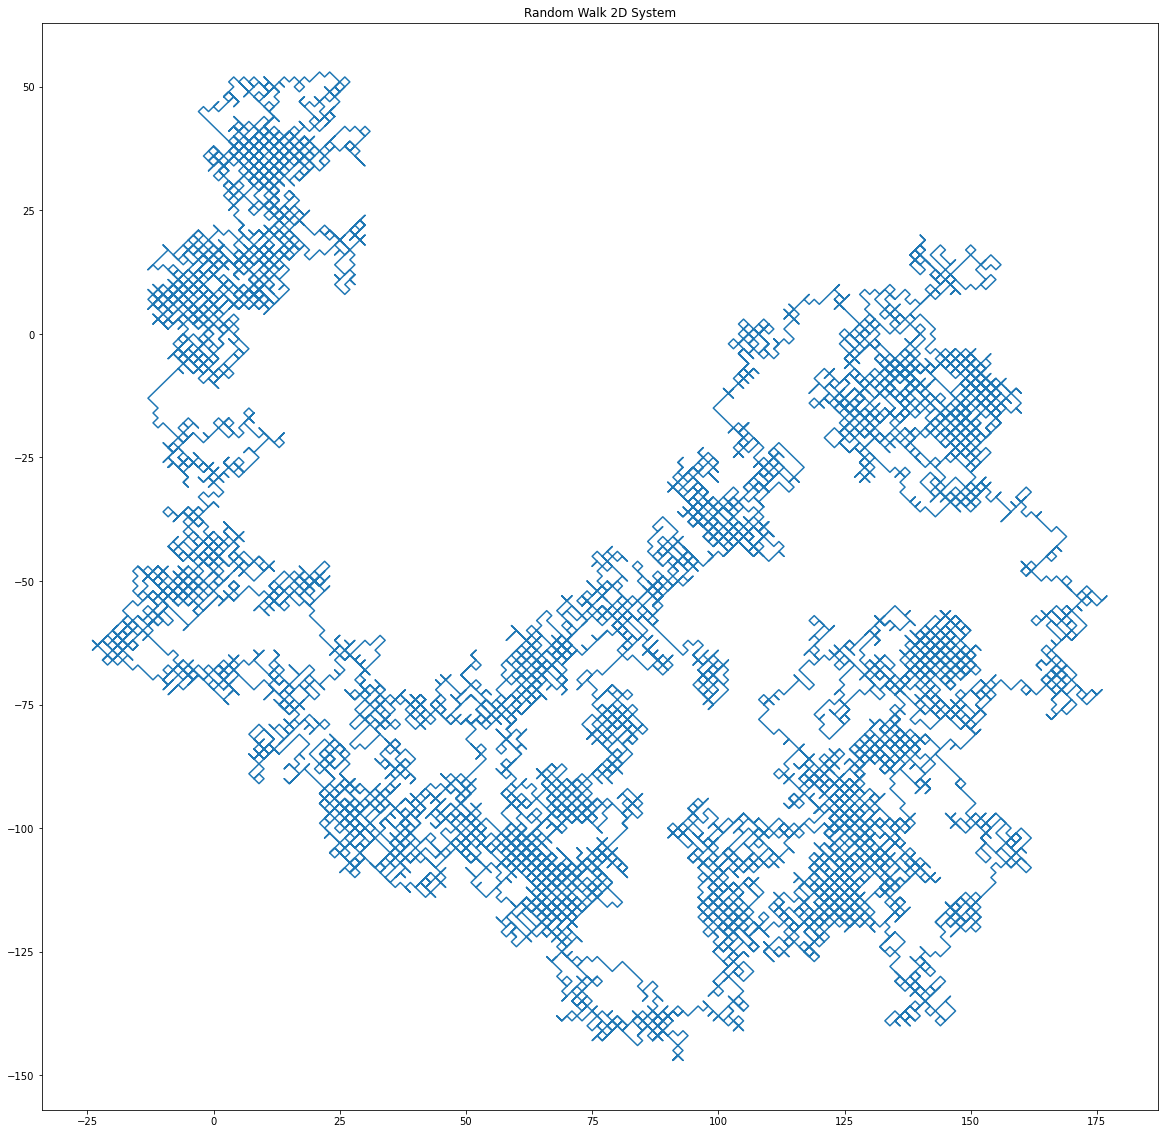

In [173]:
# solution here
from matplotlib import pyplot as plt
import pandas as pd
rWalk = rw_d(20000,2)
df = pd.DataFrame(rWalk, columns=["x","y"]) #convert to data frame
fig, ax = plt.subplots(1, figsize = (20, 20))
ax.plot(df["x"],df["y"])
ax.set(title="Random Walk 2D System")


# NLP Problem

In this problem, you will study the sentiment in a data set of tweets collected during the COVID-19 pandemic. To load the data set, run this block: 

In [1]:
import pandas as pd

def grab_tweets():
    """
    The user supplied these data already split into training and test sets. 
    This function downloads and combines them, returning a single data frame.
    No arguments. 
    """

    url1 = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/Corona_NLP_train.csv"
    url2 = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/Corona_NLP_test.csv"
    
    df1 = pd.read_csv(url1, encoding='iso-8859-1')
    df2 = pd.read_csv(url2, encoding='iso-8859-1')
    
    return pd.concat((df1, df2), axis = 0).reset_index().drop("index", axis = 1)

df = grab_tweets()

Perform a sentiment analysis of this data set. 

Many decisions are up to you. What machine learning method will you choose? How will you treat the `Sentiment` column and turn it into a target variable? Feel free to talk on Campuswire about various possibilities. You are welcome to ask me as well; however, I am likely to respond to questions like "Should I do X?" with answers like "Did you try it? What alternatives did you consider?"

For full credit, you should do the following:  

1. Explore the data set a bit. Figure out what each column means and develop a strategy for how you will use or not use it. Show your steps. 
1. Show that your model can make predictions of sentiment on unseen tweets.
2. Show that your model can produce reasonable-looking lists of strong positive and strongly negative words. 
3. Display three tweets in which your model made a mistake -- e.g. it classified the tweet as positive when in fact it was negative, or vice-versa. 
4. Include liberal comments and surrounding text to explain your steps. If you define any functions, you must also include helpful docstrings. 
5. Most instances of for-loops will be docked a few points. There may be exceptions, but I can't think of any at the moment. Try to do the entire problem with no for-loops at all. 

OPTIONALLY, you may choose to look into the text classification tools in the `nltk` package. In this course, we have mostly treated `nltk` as a convenience tool for accessing certain data sets. However, `nltk` also implements its own versions of a number of highly useful functions for text analysis, including sentiment analysis. Section 1.3 of [this chapter](https://www.nltk.org/book/ch06.html) of the `nltk` manual can help you get started. Using `nltk` for this problem might help you get some better results and learn some nifty tricks, but is not at all required. 

#### Your Solution

Based on briefly looking at these data, I decided to gain my statistical power by combining positive and extremely positive, as well as negative and extremely negative. This would give my model more room to delineate between positive, negative, and neutral, which is ultimately more important than delineating between positive and extremely positive, etc.

In [6]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


## Preprocessing and Feature Selection

In [60]:
# start here, but a good solution will surely require multiple code and markdown text blocks. 
import numpy as np
import pandas as pd
import nltk
from sklearn import preprocessing

tweets = df.copy() #create copy of df
tweets = tweets.dropna() #remove NA values seen in rows/columns of the data

#next, we want to create labels through preprocessing library from sklearn
le = preprocessing.LabelEncoder()
tweets["Location"] = le.fit_transform(tweets["Location"])
tweets["TweetAt"] = le.fit_transform(tweets["TweetAt"])
#however, we first want to combine pos w/ extreme pos and WLOG neg and extreme neg
tweets["Sentiment"] = tweets["Sentiment"].replace(["Extremely Negative"], "Negative") #replace with negative
tweets["Sentiment"] = tweets["Sentiment"].replace(["Extremely Positive"], "Positive") #replace with positive
tweets["Sentiment"] = le.fit_transform(tweets["Sentiment"])

In [49]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,6136,28,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,3800,48752,11042,28,advice Talk to your neighbours family to excha...,2
2,3801,48753,11319,28,Coronavirus Australia: Woolworths to give elde...,2
5,3804,48756,13073,28,As news of the regionÂs first confirmed COVID...,2
6,3805,48757,319,28,Cashier at grocery store was sharing his insig...,2


In [10]:
tweets.Sentiment.value_counts()

2    15590
0    13272
1     6669
Name: Sentiment, dtype: int64

In [40]:
#create our x, y matrices
x = tweets.drop(["Sentiment"],axis=1)
y = tweets["Sentiment"]
x.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
0,3799,48751,6136,28,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,11042,28,advice Talk to your neighbours family to excha...
2,3801,48753,11319,28,Coronavirus Australia: Woolworths to give elde...
5,3804,48756,13073,28,As news of the regionÂs first confirmed COVID...
6,3805,48757,319,28,Cashier at grocery store was sharing his insig...


In [12]:
x.shape

(35531, 5)

### Model Selection

I chose to use the standard logistic regression. This is because our observations do not exceed the number of covariates we use for the model. In general, this is a solid rule of thumb for LR. Moreover, I'm pretty sure that we don't violate CLT as well because our `m` columns are s.t. `n >>> m`. I used `lbfgs` to attempt to find a better optmizing function that `liblinear` (default) in hopes of a faster convergence. It has a faster convergence than Newton's (`O(n^2)` vs `O(n^3)`, and liblinear is sometimes slow for larger data). (See Math 164 for more)

For this, we can preliminarily test every single column as a means of demonstrating a need to do a sentiment analysis more carefully. 

In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(1000) #set seed
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4) #split 60 40 test as seen in class

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

def CV_score(cols):
    """
    Seen in class. 
    Trains and evaluates a model via cross-validation on the columns of the data with selected indices
    """
    LR = LogisticRegression(max_iter=100000, solver="lbfgs")

    return cross_val_score(LR, x_train[cols], y_train, cv = 10).mean() 

This function was from my HW #7 and is seen in my project. I wanted to compare every subset of 2 covariates, since we only have 5 total columns. Therefore, `n=2` for `subsets()`.

In [29]:
#FROM HW 7

import itertools
from itertools import combinations, chain

def subsets(arr,n):
    """
    Finds total number of subsets for a given size and existing array using combinations from itertools library
    """
    return list(combinations(arr,n))


cov_subsets = subsets(x_train.columns,2)

#----------------------------------------------------------------------------------------------------------------


In [30]:
#NOTE: Since this function is used in the context of feature selection/cross validation,
#using a for loop here should be acceptable

scores = []
for i in range(0,len(cov_subsets)): #loop through all the combinations
    scores.append(    (cov_subsets[i]   , CV_score(list(cov_subsets[i])))    ) 
    #add to our list of scores based on different column combos

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 73, in inner_f
    return f(**kwargs)
  File "/Users/qianzach/opt/anaconda3/lib/python3.8/site-packa

In [31]:
sorted(scores, key=lambda x: x[1],reverse=True) #sort by score high to low, show top 10

[(('UserName', 'Location'), 0.4436629430818006),
 (('UserName', 'TweetAt'), 0.4420678221870837),
 (('UserName', 'OriginalTweet'), nan),
 (('ScreenName', 'Location'), 0.44239610837251925),
 (('ScreenName', 'TweetAt'), 0.44239610837251925),
 (('ScreenName', 'OriginalTweet'), nan),
 (('Location', 'TweetAt'), 0.44234920405732225),
 (('UserName', 'ScreenName'), 0.44197423366140676),
 (('Location', 'OriginalTweet'), nan),
 (('TweetAt', 'OriginalTweet'), nan)]

As you can see, we have such bad accuracy for every single ocmbination. Therefore, we can fairly say that we need to use `CountVectorizer` as our model is pretty bad at the moment (0.44 is our max!!!)

## Model Construction

In this case, we still keep the same exact structure for our sentiment levels (positive, neutral, negative only). 

However, we perform a basic sentiment analysis alongside with our Logistic Regression Model. 

**Note:** We do not drop the NaN values we see for `Location` and other columns because we do not plan on using them, and instead use our `CountVectorizer` output as our covariates we use in our logistic regression.

In [98]:
#redoing our data cleaning
tweets = df.copy()
tweets["Sentiment"] = tweets["Sentiment"].replace(["Extremely Negative"], "Negative") #replace with negative
tweets["Sentiment"] = tweets["Sentiment"].replace(["Extremely Positive"], "Positive") #replace with positive
tweets["Sentiment"] = le.fit_transform(tweets["Sentiment"])
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [99]:
#Code from class, pretty standard 
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_df = 0.2, min_df = 30, stop_words = 'english')
counts = vec.fit_transform(tweets['OriginalTweet'])
count_df = pd.DataFrame(counts.toarray(), columns = vec.get_feature_names())

In [100]:
tweets_df = pd.concat((tweets, count_df), axis = 1)
print(tweets_df.shape)
tweets_df.head()

(44955, 3270)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,00,000,03,10,...,yesterday,yo,york,young,youtube,youâ,yâ,zealand,zero,zombie
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We then split the data into our training data and test data sets at a 60-40 split. 

In [101]:
#create new split
from sklearn.model_selection import train_test_split

np.random.seed(1000)


train, test = train_test_split(tweets_df, test_size = 0.4)

x_train = train.drop(["UserName","ScreenName", "Location", "TweetAt","OriginalTweet", "Sentiment"],axis=1)
y_train = train["Sentiment"]


x_test = test.drop(["UserName","ScreenName", "Location", "TweetAt","OriginalTweet","Sentiment"],axis=1)
y_test = test["Sentiment"]

In [102]:
x_test.head(2) #quick inspection

,00,000,03,10,100,1000,10downingstreet,11,12,13,...,yesterday,yo,york,young,youtube,youâ,yâ,zealand,zero,zombie
32091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Parameter Optimization: Cross Validation

**Remark:** our solver went back to the standard liblinear, as we saw no big difference in run-time. 

In [106]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 10000)
LR.fit(x_train, y_train)
LR.score(x_train, y_train)

0.8666444221999777

86.7% is mediocre. We hope to maximize our scores. 

We hope to optimize our parameter C, which controls our complexity for the logistic regression model. Therefore, we can construct a grid and perform a gridsearch and k-fold cross validation pipeline.

In [116]:
for C in np.linspace(0.1, 0.6, 10):
    print(str(np.round(C, 4)), end = ": ")
    LR = LogisticRegression(C = C ,max_iter=10000)
    cv_score = cross_val_score(LR, x_train, y_train, cv = 5).mean()
    print(np.round(cv_score, 3))

0.1: 0.76
0.1556: 0.763
0.2111: 0.764
0.2667: 0.764
0.3222: 0.764
0.3778: 0.764
0.4333: 0.764
0.4889: 0.764
0.5444: 0.764
0.6: 0.763


Seeing marginal difference between 0.211 and 0.544, we'll choose our C constant to be 0.375, which happens to be in the middle.

In [119]:
LR = LogisticRegression(C = 0.375, max_iter=10000)
LR.fit(x_train, y_train)
LR.score(x_test, y_test)

0.7871204537871205

Thus, we can see that our accuracy is around 0.79-- Not bad! 

## Sentiment Analysis

Now, since we have our model done, we want to investigate our coefficients. We construct a data frame of our results, which comprise of the words on the training columns, as well as their corresponding coefficients.

In [138]:
result_df = pd.DataFrame({"coef" : LR.coef_[2], "word" : x_train.columns}) #chose the last index because
#this is referring to happy as our positive coefficients; if we did LR.coef_[0], negative would be the baseline
#and positive would be negative coefficients
result_df

,coef,word
0,-0.463279,00
1,-0.024210,000
2,-0.335094,03
3,-0.079523,10
4,0.034865,100
...,...,...
3259,-0.083372,youâ
3260,0.027916,yâ
3261,-0.062976,zealand
3262,0.151466,zero


We verify that the positive words are actually positive:

In [139]:
#MOST NEGATIVE WORDS:
result_df.sort_values('coef', ascending = True).head(10) #sort ascending starting with the most negative

,coef,word
1084,-1.435878,failing
728,-1.363973,crisis
1369,-1.358281,hell
2157,-1.314671,poor
2514,-1.296416,scams
3136,-1.257559,war
1590,-1.221129,kill
1444,-1.207492,hurt
827,-1.197086,died
1087,-1.142145,fake


Great! We see that this is the case.

Now, we can look at the negatively-connotated words:

In [140]:
#MOST POSITIVE WORDS
result_df.sort_values('coef', ascending = False).head(10) #sort descending

,coef,word
304,2.265577,best
1328,2.108497,hand
1293,2.032075,great
3208,1.997613,won
2163,1.845890,positive
2503,1.810344,save
1201,1.803449,free
2480,1.793095,safe
2698,1.785305,special
1211,1.775590,friend


These are all logical and intuitive. This indicates our model is solid!

We can also check neutral words. They usually have the coeficients around 0. We can choose the middle 10 words:

In [133]:
#NEUTRAL WORDS
result_df.sort_values('coef', ascending = False).iloc[int(result_df.shape[0]/2):int((result_df.shape[0]/2)+10)]

,coef,word
3157,0.020862,ways
284,0.020650,bc
932,0.020546,earlier
2973,0.020344,trade
2666,0.020309,snap
1203,0.019873,freezer
893,0.019863,donations
314,0.019682,billion
2860,0.019583,sydney
2951,0.019532,toll


Looks very neutral to me!

In [135]:
tweets.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0


In [136]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [137]:
LR.coef_.shape

(3, 3264)

## Error Analysis
As usual, we would like to investigate more of the errors to see how we can improve our model and understand how it operates

1. Display three tweets in which your model made a mistake -- e.g. it classified the tweet as positive when in fact it was negative, or vice-versa.
2. Include liberal comments and surrounding text to explain your steps. If you define any functions, you must also include helpful docstrings.
3. Most instances of for-loops will be docked a few points. There may be exceptions, but I can't think of any at the moment. Try to do the entire problem with no for-loops at all.

We can look at our errors through a confusion matrix. First, we construct one based on a `predict()` object. 

In [141]:
from sklearn.metrics import confusion_matrix

y_predict = LR.predict(x_test) #define our prediction label array as y_predict
confusionMatrix = confusion_matrix(y_test, y_predict) #initialize our confusion matrix

confusionMatrix

array([[5345,  597,  857],
       [ 515, 2294,  477],
       [ 842,  540, 6515]])

Then, we can actually investigate our mistakes:

In [167]:
mistakes = (x_test)[y_test != y_predict] #find mistakes
mistaken_labels = y_test[y_test != y_predict] #find wrong labels
mistaken_preds = y_predict[y_test != y_predict]

print(mistaken_labels) #the actual labels
print(mistaken_preds) #what we predicted

#mistakes.head()

32091    0
34810    1
5677     1
15290    2
6307     1
        ..
9320     0
19333    1
31962    1
22241    0
12748    0
Name: Sentiment, Length: 3828, dtype: int64
[2 0 0 ... 0 2 1]


In [166]:
print(mistaken_preds[0:4]) #what we predicted


[2 0 0 0]


In [162]:
#first tweet
print("Predicted sentiment was: ", mistaken_preds[0]) #POSITIVE = 2
print("Actual sentiment was: ", df.iloc[32091].Sentiment)
print(df.iloc[32091]["OriginalTweet"])

Predicted sentiment was:  2
Actual sentiment was:  Negative


https://t.co/4UIHolurhn


We may have thought it was positive due to the "goods" in the first sentence of the tweet. This is incorrect because the "goods" usage is a noun and not an adjective. Therefore, even though the sentiment was negative upon human inspection, our model categorized it as positive.

In [163]:
#second tweet
print("Predicted sentiment was: ", mistaken_preds[1]) #NEGATIVE
print("Actual sentiment was: ", df.iloc[34810].Sentiment)
print(df.iloc[34810]["OriginalTweet"])

Predicted sentiment was:  0
Actual sentiment was:  Neutral
"Rice prices surge to 7-year high as coronavirus sparks stockpiling" #Rice #Coronavirus #Covid19 #Rice #Food #UnitedNations #UN #RedCross #FEMA #Republicans #Democrats #Congress https://t.co/MugR0trpEx


Here, we predicted the tweet was negative, most likely through "surge" and "coronavirus," though this tweet was purely for providing objective news.

In [165]:
#third tweet
print("Predicted sentiment was: ", mistaken_preds[2]) #NEGATIVE
print("Actual sentiment was: ", df.iloc[5677].Sentiment)
print(df.iloc[5677]["OriginalTweet"])

Predicted sentiment was:  0
Actual sentiment was:  Neutral

https://t.co/YNMBXBCTZZ


Lastly, we may have assumed that this was negative due to the words "austerity," "crashing," and "coronavirus," all which have relatively negative connotations. However, this was also meant to be an informative tweet, rather than an ill-natured one.